<a href="https://colab.research.google.com/github/tincho-mehaudy/DMCyT/blob/master/Abrir_datos_en_colab_(Ley_de_potencias).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Referencias:

https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

https://colab.research.google.com/notebooks/io.ipynb#scrollTo=vz-jH8T_Uk2c

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos desde la computadora

In [ ]:
from google.colab import files
import io

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving 5_1_all_rank_noun.txt to 5_1_all_rank_noun.txt
Saving 5_2_all_rank_verb.txt to 5_2_all_rank_verb.txt
Saving 5_3_all_rank_adjective.txt to 5_3_all_rank_adjective.txt
Saving 5_4_all_rank_adverb.txt to 5_4_all_rank_adverb.txt
Saving 5_5_all_rank_pron.txt to 5_5_all_rank_pron.txt
Saving 5_6_all_rank_determ.txt to 5_6_all_rank_determ.txt
Saving 5_7_all_rank_detpro.txt to 5_7_all_rank_detpro.txt
Saving 5_8_all_rank_preposition.txt to 5_8_all_rank_preposition.txt
Saving 5_9_all_rank_conjunction.txt to 5_9_all_rank_conjunction.txt
Saving 5_10_all_rank_interjection.txt to 5_10_all_rank_interjection.txt
User uploaded file "5_1_all_rank_noun.txt" with length 35954 bytes
User uploaded file "5_2_all_rank_verb.txt" with length 12295 bytes
User uploaded file "5_3_all_rank_adjective.txt" with length 12902 bytes
User uploaded file "5_4_all_rank_adverb.txt" with length 5454 bytes
User uploaded file "5_5_all_rank_pron.txt" with length 558 bytes
User uploaded file "5_6_all_rank_determ.txt" with len

In [ ]:
# Tomo los nombres de los archivos
filenames = list(uploaded.keys())

In [ ]:
# Cargo el primero
df = pd.read_csv(io.BytesIO(uploaded[filenames[0]]), sep='\t', header=None)
df.head()

,0,1,2
0,NaN,time,1833
1,NaN,year,1639
2,NaN,people,1256
3,NaN,way,1108
4,NaN,man,1003


In [ ]:
# Cargo todos
df = pd.read_csv(io.BytesIO(uploaded[filenames[0]]), sep='\t', header=None)# Dataset is now stored in a Pandas Dataframe
for filename in filenames[1:]:
  df1 = pd.read_csv(io.BytesIO(uploaded[filename]), sep='\t', header=None)# Dataset is now stored in a Pandas Dataframe
  df = pd.concat([df, df1]) #join, merge
  print('%s: size = %d, tot=%d'%(filename,df1.shape[0],df.shape[0]))
df.head()

5_2_all_rank_verb.txt: size = 1112, tot=4142
5_3_all_rank_adjective.txt: size = 1035, tot=5177
5_4_all_rank_adverb.txt: size = 429, tot=5606
5_5_all_rank_pron.txt: size = 50, tot=5656
5_6_all_rank_determ.txt: size = 13, tot=5669
5_7_all_rank_detpro.txt: size = 32, tot=5701
5_8_all_rank_preposition.txt: size = 122, tot=5823
5_9_all_rank_conjunction.txt: size = 50, tot=5873
5_10_all_rank_interjection.txt: size = 18, tot=5891


,0,1,2
0,NaN,time,1833
1,NaN,year,1639
2,NaN,people,1256
3,NaN,way,1108
4,NaN,man,1003


# Cargar los datos desde Google Drive

In [ ]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

Dos cosas que van a necesitar
1. Al subir los documentos no se tienen que convertir automaticamente a Google Doc (.gdoc). Para eso, en Google Drive van a Configuración (o Settings) y descliquean la opción: 'Convertir Archivos Subidos'
1. Una vez que estan en el navegador, en la carpeta que quieren del drive van a ver que la dirección es: https://drive.google.com/drive/folders/"___CODIGO___". Tienen que copiar ese código y pegarlo donde dice ___CODIGO___ en la celda de abajo.
1. Probablemente, en algún punto les va a abrir una ventana de google para autorizar a colab a acceder al drive

In [ ]:
# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
#file_list = drive.ListFile(
#    {'q': "___CODIGO___ in parents"}).GetList()
file_list = drive.ListFile(
    {'q': "'1RjAnTdnkTpBqAFx69YDNQLF3RWt-4S6D' in parents"}).GetList()

In [ ]:
# 3. Create & download by id.
for f in file_list:
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

title: 5_7_all_rank_detpro.txt, id: 12NC_anUNrzLe-iN1y_AQSu_GgVT5qYat
downloading to /root/data/5_7_all_rank_detpro.txt
title: 5_4_all_rank_adverb.txt, id: 1qpKDGeX77anpldZAnAl9eCDXi0MCZsu5
downloading to /root/data/5_4_all_rank_adverb.txt
title: 5_6_all_rank_determ.txt, id: 1NkMCghSPt5-DlBPgN1V_lkcx6DNfXxZz
downloading to /root/data/5_6_all_rank_determ.txt
title: 5_3_all_rank_adjective.txt, id: 1QTKlGQe_ge9l_SzaBD5tQY4XDu3A4GHb
downloading to /root/data/5_3_all_rank_adjective.txt
title: 5_10_all_rank_interjection.txt, id: 1wFAmv5ZKJgvxLF13juyZj8jhjuM_RRKE
downloading to /root/data/5_10_all_rank_interjection.txt
title: 5_1_all_rank_noun.txt, id: 1_NjgImtpKUc_bZJWt7fz2MHqmm5HzeN0
downloading to /root/data/5_1_all_rank_noun.txt
title: 5_2_all_rank_verb.txt, id: 1pUoBcvZnfcaHYbHDEGKZw4tkUl9hxgJ9
downloading to /root/data/5_2_all_rank_verb.txt
title: 5_9_all_rank_conjunction.txt, id: 1HhJ5U728hGL5BXY_vsrDFAIE3spqf4Nc
downloading to /root/data/5_9_all_rank_conjunction.txt
title: 5_8_all_ran

In [ ]:
file_list

[GoogleDriveFile({'kind': 'drive#file', 'id': '12NC_anUNrzLe-iN1y_AQSu_GgVT5qYat', 'etag': '"MTQxNTczMDgxMzAwMA"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/12NC_anUNrzLe-iN1y_AQSu_GgVT5qYat', 'webContentLink': 'https://drive.google.com/uc?id=12NC_anUNrzLe-iN1y_AQSu_GgVT5qYat&export=download', 'alternateLink': 'https://drive.google.com/file/d/12NC_anUNrzLe-iN1y_AQSu_GgVT5qYat/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/12NC_anUNrzLe-iN1y_AQSu_GgVT5qYat/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/text/plain', 'thumbnailLink': 'https://lh3.googleusercontent.com/K4SpWFar2FGc7nisIQ_e_SRhj9vixcJs36pu_rk6MaSKDnZ-5-VnIx3L84omlE9vUoQoS_8sqVg=s220', 'title': '5_7_all_rank_detpro.txt', 'mimeType': 'text/plain', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2020-07-02T02:57:24.942Z', 'modifiedDate': '2014-1

In [ ]:
# Cargo todos
downloaded = drive.CreateFile({'id':file_list[0]['id']}) 
downloaded.GetContentFile(file_list[0]['title'])  
df = pd.read_csv(file_list[0]['title'], sep='\t', header=None)
for f in file_list[1:]:
  downloaded = drive.CreateFile({'id':f['id']}) 
  downloaded.GetContentFile(f['title'])  
  df1 = pd.read_csv(f['title'], sep='\t', header=None)
  df = pd.concat([df, df1])
  print('%s: size = %d, tot=%d'%(f['title'],df1.shape[0],df.shape[0]))
df.head()

5_4_all_rank_adverb.txt: size = 429, tot=461
5_6_all_rank_determ.txt: size = 13, tot=474
5_3_all_rank_adjective.txt: size = 1035, tot=1509
5_10_all_rank_interjection.txt: size = 18, tot=1527
5_1_all_rank_noun.txt: size = 3030, tot=4557
5_2_all_rank_verb.txt: size = 1112, tot=5669
5_9_all_rank_conjunction.txt: size = 50, tot=5719
5_8_all_rank_preposition.txt: size = 122, tot=5841
5_5_all_rank_pron.txt: size = 50, tot=5891


,0,1,2
0,NaN,this,4623
1,NaN,that,3792
2,NaN,which,3719
3,NaN,what,2493
4,NaN,all,2436


In [ ]:
df.head(10)

,0,1,2
0,NaN,this,4623
1,NaN,that,3792
2,NaN,which,3719
3,NaN,what,2493
4,NaN,all,2436
5,NaN,some,1712
6,NaN,these,1254
7,NaN,any,1220
8,NaN,many,902
9,NaN,those,888


# Darle el formato que quiero a los datos

In [ ]:
# Remove first column
df = df.drop(0,axis=1)
df.head()

,1,2
0,this,4623
1,that,3792
2,which,3719
3,what,2493
4,all,2436


In [ ]:
# Change column names
df.columns = ["Word","Frequency"]
df.head()

,Word,Frequency
0,this,4623
1,that,3792
2,which,3719
3,what,2493
4,all,2436


In [ ]:
# Sort columns by Frequency
df = df.sort_values(by ='Frequency',ascending=False)
df.head(20)

,Word,Frequency
0,the,61847
0,be,42277
0,of,29391
0,and,26817
1,a,21626
1,in,18214
1,have,13655
0,it,10875
2,to,9343
1,i,8875


In [ ]:
df['Rank'] = np.arange(len(df.index))
df.head()

,Word,Frequency,Rank
0,the,61847,0
0,be,42277,1
0,of,29391,2
0,and,26817,3
1,a,21626,4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


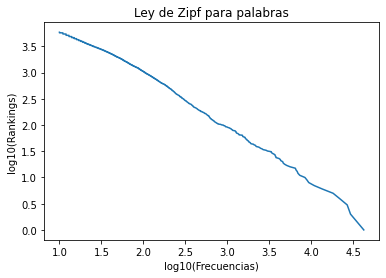

In [ ]:
r = df['Rank'].to_numpy()
f = df['Frequency'].to_numpy()

plt.plot(np.log10(f), np.log10(r))
plt.xlabel('log10(Frecuencias)')
plt.ylabel('log10(Rankings)')
#plt.plot(f, r)
#plt.xlabel('Frecuencias')
#plt.ylabel('Rankings')
plt.title('Ley de Zipf para palabras')
plt.show()